In [22]:
import pandas as pd
import pickle
with open('pickle_models/calculation_amyloid_corrected.pickle', 'rb') as f:
    resultdf = pickle.load(f)

In [23]:
import dtale
resultdf.fillna(0,inplace=True)

In [24]:
dtale.show(resultdf)

In [5]:
!pip install missingno

In [25]:
listnames = ['experimental_method','oligomeric_state1','oligomeric_state2','symmetry']
columns_track = []

for column in listnames:
    
    current_list = resultdf[column].tolist()
    element_number = {}
    numbered_list = []
    list_elements = []
    # On definit un chiffre et on incremente pour chaque nouvel element dans la liste
    for element in current_list:
        if element not in element_number:
            element_number[element] = len(element_number) + 1

        numbered_list.append(element_number[element])
        list_elements.append((element, element_number[element]))
    
    # Me permet de garder une trace sur quel element numerique correspond à quoi 
    columns_track.append(list(set(list_elements)))
    resultdf[column] = numbered_list
    
    #print(numbered_list)

print(columns_track)

[[('SOLID-STATE NMR', 3), ('SOLUTION NMR', 1), ('ELECTRON CRYSTALLOGRAPHY', 4), ('ELECTRON MICROSCOPY', 5), ('X-RAY DIFFRACTION', 2)], [('hexadecameric', 11), ('octameric', 7), ('undecameric', 16), ('1824-meric', 15), ('nonameric', 9), ('decameric', 13), ('tridecameric', 20), ('36-meric', 22), ('tetrameric', 4), ('32-meric', 19), ('helical', 10), ('Dimeric', 21), ('dodecameric', 3), ('trimeric', 6), ('dimeric', 2), ('270-meric', 18), ('27-meric', 12), ('octadecameric', 8), ('pentameric', 5), ('hexameric', 14), ('monomeric', 1), ('eicosameric', 17)], [('Homo 1368-mer', 11), ('Homo 32-mer', 22), ('Monomer', 1), ('Hetero 36-mer', 28), ('Hetero 13-mer', 26), ('Homo 5-mer', 5), ('Hetero 9-mer', 27), ('Homo 8-mer', 7), ('Homo 1824-mer', 16), ('Homo 10-mer', 14), ('Homo 912-mer', 10), ('Hetero 270-mer', 21), ('Homo 27-mer', 13), ('Hetero 8-mer', 20), ('Hetero 2-mer', 23), ('Hetero 4-mer', 24), ('Homo 12-mer', 3), ('Homo 16-mer', 12), ('Hetero 12-mer', 25), ('Homo 18-mer', 8), ('Homo 6-mer', 1

In [26]:
results_filtered = resultdf.drop(['DF_DSSP', 'DF_H', 'PDB_ID', 'AAseq','fasta','AAseq_full'], axis=1)

In [27]:
dtale.show(results_filtered)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
results_filtered.iloc[:,0:-1] = scaler.fit_transform(results_filtered.iloc[:,0:-1].to_numpy())

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(results_filtered.drop('is_amyloid', axis=1), results_filtered['is_amyloid'], test_size=0.2, random_state=42)

In [29]:
print(X_test.columns)

Index(['nb H_bond / nres', 'nb H_bond total', 'H_bond / nb_res * nb_chains',
       'Max_hbonds_number', 'Number of chains', 'SASA_unedited', 'SASA_full',
       'SASA_theo', 'Alignement_total', 'Alignement_moyen', 'Hydrophobicity',
       'Hydropathy', 'experimental_method', 'oligomeric_state1',
       'oligomeric_state2', 'atom_count', 'H_atom_count', 'symmetry', 'H', 'I',
       'T', 'G', 'E', 'B', 'S'],
      dtype='object')


In [30]:
dtale.show(X_test)

In [7]:
import missingno as msno
import dtale

In [31]:
pickle.dump([columns_track,X_test.columns,listnames], open('columns.pickle', 'wb'))

In [32]:
dtale.show(resultdf)

In [33]:
dtale.show(results_filtered)

In [34]:
msno.matrix(results_filtered.sample(250))

NameError: name 'msno' is not defined

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the random forest classifier: {accuracy:.3f}')

Accuracy of the random forest classifier: 0.988


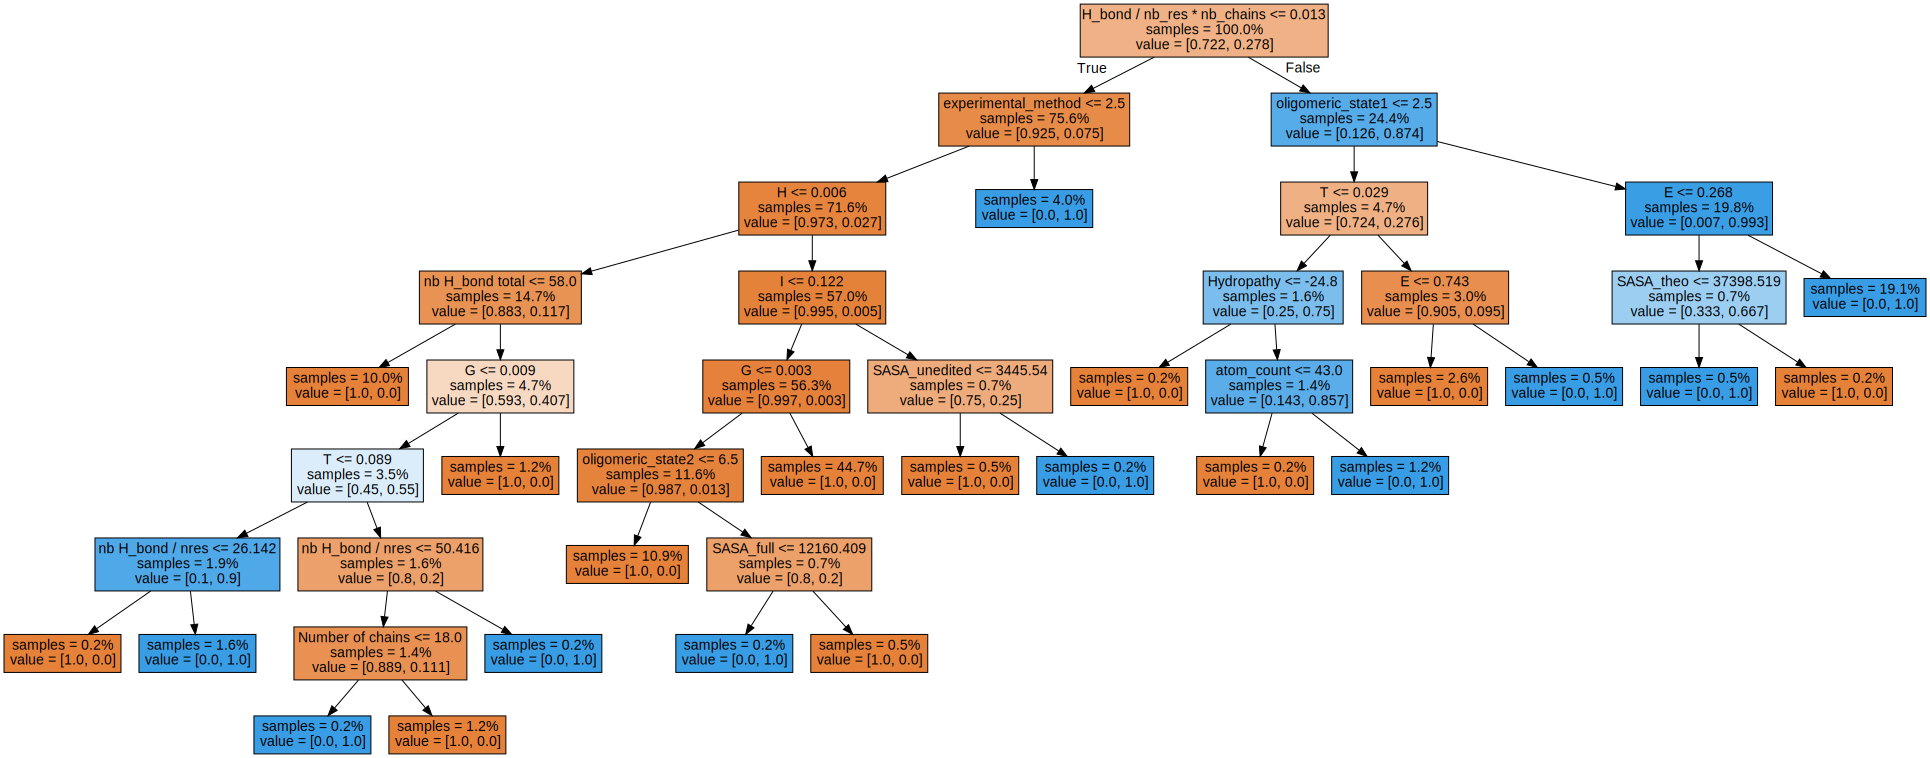

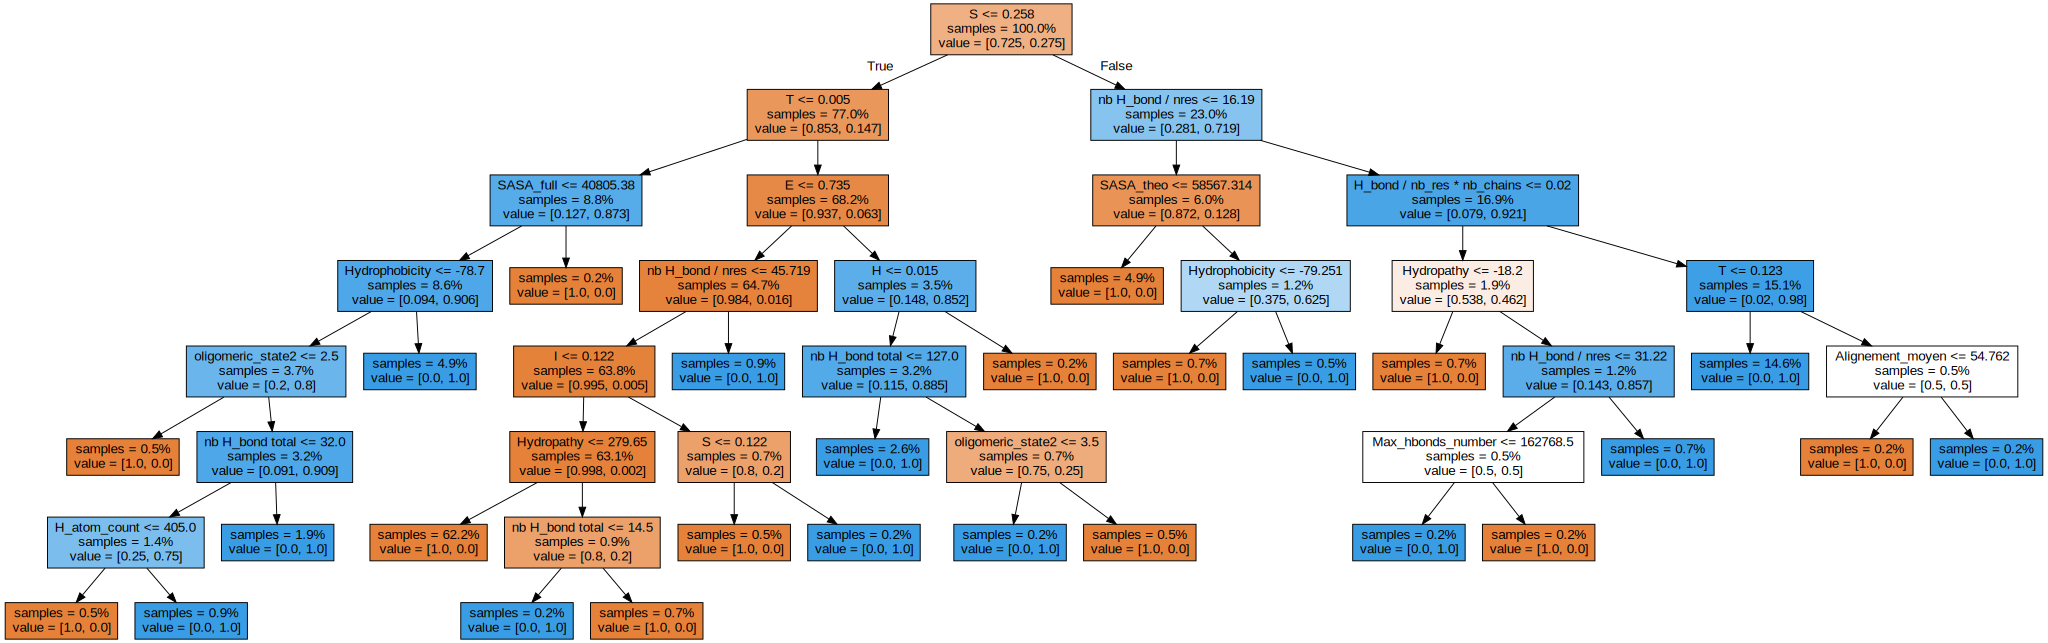

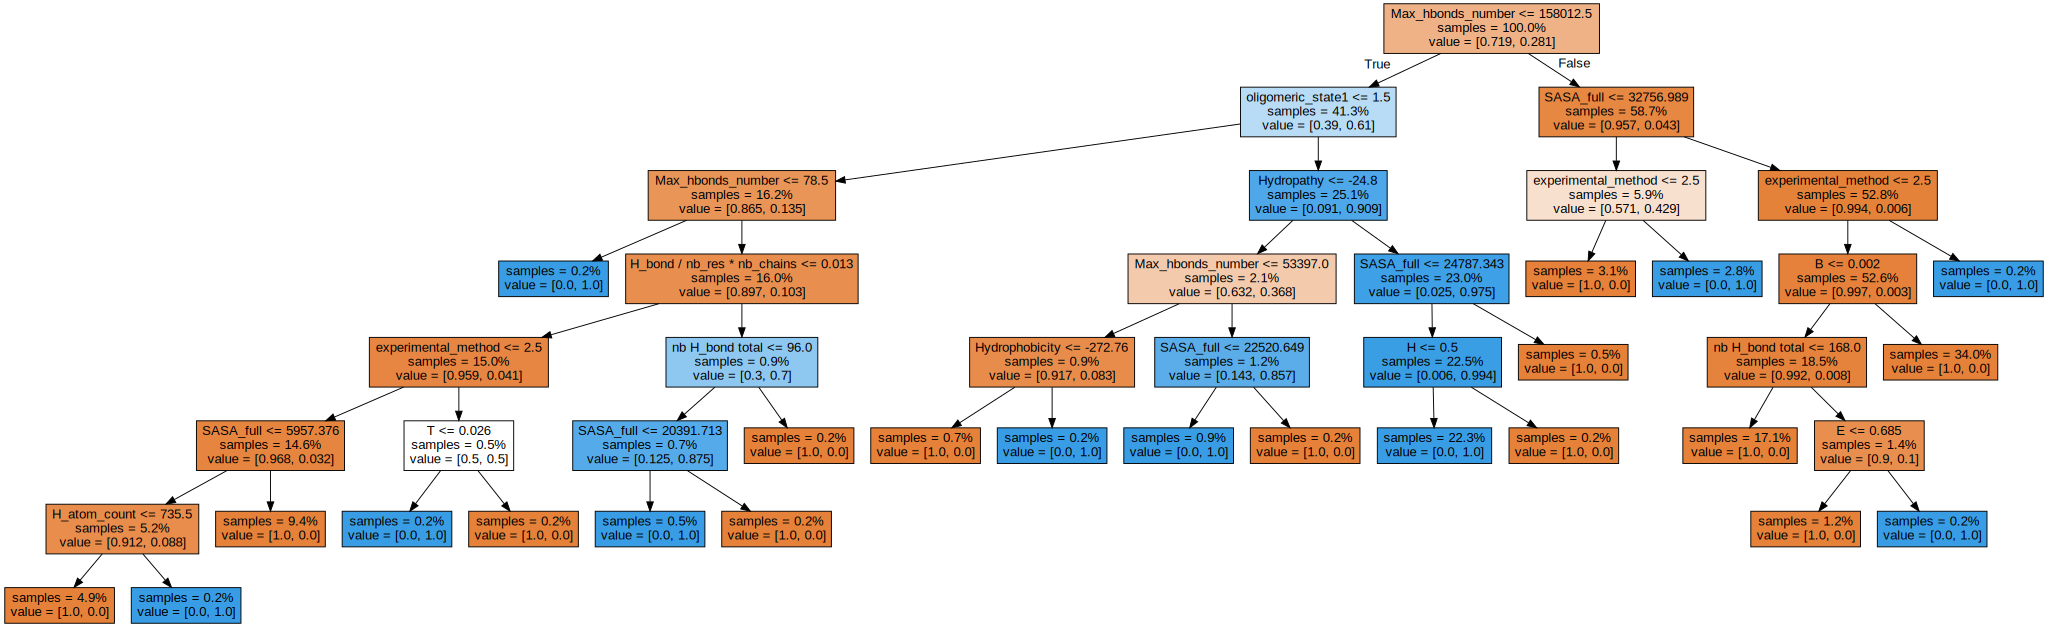

In [36]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data) 
    display(graph)
    graph.render(filename=f'tree_{i}', format='svg')

In [11]:
!pip install scikit-learn

In [12]:
with open('results.pickle', 'rb') as f:
    res = pickle.load(f)
    
print(res)

['7N8R', '2NAO', '2ONV', '4XFN', '4XFO', '8B3A', '3Q9J', '5TPT', '3Q9H', '3Q9I', '7ROL', '3Q9G', '2KIB', '7QV6', '6DIX', '6DIY', '6DJ0', '7QV5', '2LBU', '3FOD', '2OKZ', '2OL9', '2OLX', '6G8E', '8ADE', '3DGJ', '2OMP', '2ONA', '2ONW', '6G8C', '6G8D', '2ONX', '7QVC', '7QWG', '7QWL', '7QWM', '2RNM', '6G9G', '6MST', '2KJ3', '6GS3', '7K3Y', '6FHD', '7K3X', '3PPD', '6FHC', '6IC3', '6C3S', '6C3T', '3SGR', '6C3F', '6C4O', '6ZRF', '6ZRQ', '6ZRR', '6FG4', '6FGR', '2M5K', '2M5M', '6C88', '3SGM', '3SGN', '3SGO', '3SGP', '3SGS', '4OLR', '4ONK', '7SXN', '7ZKY', '6C3G', '6RHA', '6RHB', '6RHD', '3DG1', '3FR1', '7K3C', '3FVA', '2M5N', '3ZPK', '3FPO', '3FTR', '6HUD', '4R0P', '3FTH', '3FTK', '3FTL', '5I55', '2OMM', '5KNZ', '5KO0', '7ROJ', '3DVF', '3DVI', '6GQ5', '2MUS', '6GQ2', '6GQC', '6EEX', '6M7M', '5MGQ', '6M9I', '6M9J', '6CB9', '6CEW', '7M61', '7M62', '7M64', '7M65', '6Z1I', '2Q1E', '5W50', '5W52', '5W7V', '7YKW', '7YL0', '7YL3', '7YL7', '2Q20', '7LUZ', '3NVG', '3NVH', '7QIG', '3NVF', '3NVE', '7BX7',

2023-05-15 17:49:35,826 - INFO     - Executing shutdown due to inactivity...
2023-05-15 17:49:35,905 - INFO     - Executing shutdown...
2023-05-15 17:49:35,906 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint

In [37]:
filename = 'first_model.sav'
pickle.dump(rf, open(filename, 'wb'))

2023-05-24 23:27:07,373 - INFO     - Executing shutdown due to inactivity...
2023-05-24 23:27:07,510 - INFO     - Executing shutdown...
2023-05-24 23:27:07,512 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/louis/miniconda3/lib/python3.9/site-packages/dtale/app.py", line 433, in shutdown
    shutdown_server()
  File "/home/louis/miniconda3